In [86]:
import numpy as np
from pandas import read_csv as read
import pandas as pd

data = pd.read_csv('E:/Рабочий стол/bd5.csv')

data.sort_values(by=['date'],
        ascending=[True]).head()

,date,time,milk,sugar
499,2020-01-01,10.4,0,0
103,2020-01-01,11.6,1,4
364,2020-01-01,12.2,2,1
330,2020-01-01,13.3,0,4
441,2020-01-01,10.4,0,1


In [160]:
values = data.milk

past = 7 * 4
future = 3

In [161]:
start = past
end = len(values) - future

In [162]:
print(start, end)

28 497


In [163]:
raw_df = [ ]
for i in range(start, end):
    past_and_future_values = values [(i - past) : (i + future)]
    raw_df.append(list(past_and_future_values))

In [164]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]

In [165]:
df = pd.DataFrame(raw_df, columns=(past_columns + future_columns))
df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_21,past_22,past_23,past_24,past_25,past_26,past_27,future_0,future_1,future_2
0,2,2,0,2,1,2,0,2,0,2,...,1,2,1,1,1,1,0,0,1,1
1,2,0,2,1,2,0,2,0,2,2,...,2,1,1,1,1,0,0,1,1,0
2,0,2,1,2,0,2,0,2,2,0,...,1,1,1,1,0,0,1,1,0,0
3,2,1,2,0,2,0,2,2,0,2,...,1,1,1,0,0,1,1,0,0,2
4,1,2,0,2,0,2,2,0,2,2,...,1,1,0,0,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,2,1,0,0,0,1,0,0,1,1,...,0,2,2,1,1,0,1,1,2,0
465,1,0,0,0,1,0,0,1,1,0,...,2,2,1,1,0,1,1,2,0,0
466,0,0,0,1,0,0,1,1,0,1,...,2,1,1,0,1,1,2,0,0,1
467,0,0,1,0,0,1,1,0,1,1,...,1,1,0,1,1,2,0,0,1,2


In [166]:
x = df[past_columns] [:-1]
y = df[future_columns] [:-1]

In [167]:
x_test = df[past_columns] [-1:]
y_test = df[future_columns] [-1:]

# Linear Regression

In [168]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [169]:
LinReg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
prediction = LinReg.predict(x_test)

In [171]:
prediction

array([[1.10945589, 0.82903261, 0.93865296]])

In [172]:
y_test

,future_0,future_1,future_2
468,1,2,2


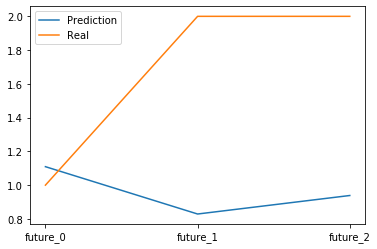

In [173]:
import matplotlib.pyplot as plt
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real")
plt.legend()

In [174]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(prediction[0], y_test.iloc[0])

0.7805901058428214

# Neural Networks

In [195]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=500, hidden_layer_sizes=(100,100,100))

In [196]:
MLP.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

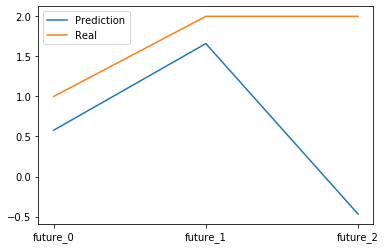

In [197]:
prediction = MLP.predict(x_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real")
plt.legend()

In [198]:
mean_absolute_error(prediction[0], y_test.iloc[0])

1.076763581839363

# RandomForest

In [179]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 1000, max_depth=10)

In [180]:
RFR.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

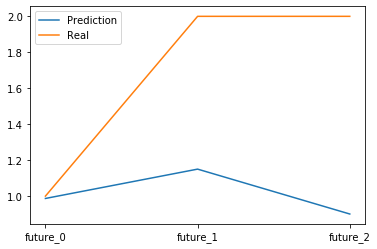

In [181]:
prediction = RFR.predict(x_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real")
plt.legend()

In [182]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.6541608946608947

# NeighborsRegressor

In [183]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=1)

In [184]:
KNN.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

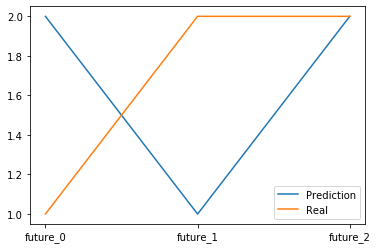

In [185]:
prediction = KNN.predict(x_test)
plt.plot(prediction[0], label="Prediction")
plt.plot(y_test.iloc[0], label="Real")
plt.legend()

In [186]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.6666666666666666

In [201]:
from sklearn.model_selection import GridSearchCV
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100))
GSCV = GridSearchCV(MLP , {
    "max_iter": [100,500,1000],
    "learning_rate_init": [0.001, 0.01],
}, cv=3, scoring='neg_mean_absolute_error')

In [202]:
GSCV.fit(x, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 100, 100),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'le

In [203]:
GSCV.best_score_

-0.8146311118516133

In [210]:
model = GSCV.best_estimator_

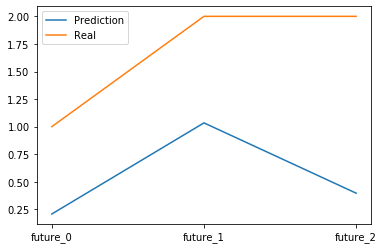

In [212]:
prediction = model.predict(x_test)[0]
plt.plot(prediction, label="Prediction")
plt.plot(y_test.iloc[0], label="Real")
plt.legend()

In [213]:
mean_absolute_error(prediction, y_test.iloc[0])

1.120052226917769